**图像的归一化(normalization)与拉伸(stretching)**  
@Time: 2022.09.15  
@Author: Ray  
@cite: https://docs.astropy.org/en/stable/visualization/normalization.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

## 什么是normalization和stretch?  
图像实际上就是二维数组（三维数据）的可视化。由于不同图像的像素值分布不同，单一的线性映射颜色已经不足以满足像素值和颜色的映射需要，因此我们需要设计不同的颜色映射来更清楚地显示出图像的细节。`cmap`参数是最直接的颜色映射改变参数，而在像素值上的变化则会凸显出更多的图像特征。通常使用`stretching`和`normalization`来调整像素值。

### Normalization（像素值的归一化）  
将图片的像素值`x`归一化到`[0, 1]`区间内，使用了如下的`线性变换`：$$x\prime = \frac{x-x_{\rm{min}}}{x_{\rm{max}}-x_{\rm{min}}}$$
其中$x\prime$是变换后的像素值，$x_{\rm{min}}$和$x_{\rm{max}}$分别是该图像的最小/最大像素值，可由不同的方法确定。

### Stretching（像素值的拉伸）
将已经归一化的像素值，通过一些变换(线性或非线性)，映射到新的像素值

---
## 确定Normalization需要的最大值最小值
* 可以理解为选择有效像素区间(Interval)，interval里的像素值变换后在0-1区间，不在interval里的像素则不在
* 有多种方案给出归一化所需的最大值最小值

In [2]:
# 本小节的实验数据
data = np.array([
    [1, 2, 3, 3, 2, 1], 
    [4, 5, 6, 6 ,5, 4], 
    [7, 8, 9, 9, 8, 7]
])

### 方案1: `MinMaxInterval`最小值最大值区间
* MinMacInterval()没有可选参数

In [3]:
from astropy.visualization import MinMaxInterval
interval = MinMaxInterval()  # 初始化该类
interval.get_limits(data) # 返回数据的最大值最小值

(1, 9)

In [4]:
interval(data)  # 对数据进行归一化

array([[0.   , 0.125, 0.25 , 0.25 , 0.125, 0.   ],
       [0.375, 0.5  , 0.625, 0.625, 0.5  , 0.375],
       [0.75 , 0.875, 1.   , 1.   , 0.875, 0.75 ]])

### 方案2: `PercentileInterval`百分位数区间
* PercentileInterval(percentile=<浮点数；使用的像素在中间的num%，即两边的都不要>, n_samples=<使用的像素数量，一般不选>)

In [5]:
from astropy.visualization import PercentileInterval
interval = PercentileInterval(percentile=50.0)  # 由于数据很少，设置个很小的比例，实际使用99.7左右
interval.get_limits(data)

(3.0, 7.0)

In [6]:
interval(data)  # 默认clip=True，低于最小值的value设置为0，高于最大值的value设置为1

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.5 , 0.75, 0.75, 0.5 , 0.25],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]])

In [7]:
interval(data, clip=False)  # 禁止裁剪

array([[-0.5 , -0.25,  0.  ,  0.  , -0.25, -0.5 ],
       [ 0.25,  0.5 ,  0.75,  0.75,  0.5 ,  0.25],
       [ 1.  ,  1.25,  1.5 ,  1.5 ,  1.25,  1.  ]])

### 方案3: `AsymmetricPercentileInterval`不对称的百分位数区间
* [min_value, lower_use, upper_use, max_value]
* 其中[lower_use, upper_use]是interval
* lower_percentile = [lower_use - min_value] / [max_value - min_value]
* upper_percentile = [max_value - upper_use] / [max_value - min_value]

In [8]:
from astropy.visualization import AsymmetricPercentileInterval
interval = AsymmetricPercentileInterval(lower_percentile=80., upper_percentile=90.)
interval.get_limits(data)

(7.600000000000001, 8.3)

In [9]:
interval(data)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.57142857, 1.        , 1.        , 0.57142857,
        0.        ]])

### 方案4: `ZScaleInterval`一个从IRAF过来的复杂算法

In [10]:
from astropy.visualization import ZScaleInterval
interval = ZScaleInterval()
interval.get_limits(data)

(1, 9)

---
## 对已经归一化的数据进行stretch
* 同样提供了多种函数（一共12种，可在import后键入Stretch通过提示查看）进行stretch
* ds9提供的stretch函数 => http://ds9.si.edu/doc/ref/how.html
* stretch的数组必须是已经完成上一步归一化的

In [11]:
# 本小节的实验数据
data = np.linspace(0, 1, num=10000)
data

array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])

1. `LogStretch`

In [12]:
from astropy.visualization import LogStretch
stretch = LogStretch()
data_LogStretch = stretch(data)
data_LogStretch

array([0.        , 0.01379688, 0.02639234, ..., 0.99997107, 0.99998554,
       1.        ])

2. `SinhStretch`

In [13]:
from astropy.visualization import SinhStretch
stretch = SinhStretch()
data_SinhStretch = stretch(data)
data_SinhStretch

array([0.00000000e+00, 2.99494663e-05, 5.98989353e-05, ...,
       9.99397138e-01, 9.99698524e-01, 1.00000000e+00])

3. `SqrtStretch`

In [14]:
from astropy.visualization import SqrtStretch
stretch = SqrtStretch()
data_SqrtStretch = stretch(data)
data_SqrtStretch

array([0.        , 0.0100005 , 0.01414284, ..., 0.99989998, 0.99994999,
       1.        ])

4. `AsinhStretch`

In [15]:
from astropy.visualization import AsinhStretch
stretch = AsinhStretch()
data_AsinhStretch = stretch(data)
data_AsinhStretch

array([0.00000000e+00, 3.33564201e-04, 6.67128069e-04, ...,
       9.99933612e-01, 9.99966807e-01, 1.00000000e+00])

5. `PowerStretch`

In [16]:
from astropy.visualization import PowerStretch
stretch = PowerStretch(a=0.2)
data_PowerStretch = stretch(data)
data_PowerStretch

array([0.        , 0.15849249, 0.18206006, ..., 0.99995999, 0.99998   ,
       1.        ])

6. [HistEqStretch](https://docs.astropy.org/en/stable/api/astropy.visualization.HistEqStretch.html?highlight=HistEqStretch)（暂不清楚）

In [17]:
from astropy.visualization import HistEqStretch
stretch = HistEqStretch(data=np.array([0, 2, 2]))
data_HistEqStretch = stretch(data)
data_HistEqStretch

array([0.00000000e+00, 5.00050005e-05, 1.00010001e-04, ...,
       4.99899990e-01, 4.99949995e-01, 1.00000000e+00])

7. [LinearStretch](https://docs.astropy.org/en/stable/api/astropy.visualization.LinearStretch.html?highlight=LinearStretch)

In [18]:
from astropy.visualization import LinearStretch
stretch = LinearStretch(slope=0.2, intercept=0.9)
data_LinearStretch = stretch(data)
data_LinearStretch

array([0.9    , 0.90002, 0.90004, ..., 1.09996, 1.09998, 1.1    ])

8. [SquaredStretch](https://docs.astropy.org/en/stable/api/astropy.visualization.SquaredStretch.html?highlight=SquaredStretch)

In [19]:
from astropy.visualization import SquaredStretch
stretch = SquaredStretch()
data_SquaredStretch = stretch(data)
data_SquaredStretch

array([0.00000000e+00, 1.00020003e-08, 4.00080012e-08, ...,
       9.99600000e-01, 9.99799990e-01, 1.00000000e+00])

9. [CompositeStretch](https://docs.astropy.org/en/stable/api/astropy.visualization.CompositeStretch.html?highlight=CompositeStretch)（混合两个stretch）

In [20]:
from astropy.visualization import CompositeStretch
stretch = CompositeStretch(transform_1=SquaredStretch(), transform_2=PowerStretch(a=0.2))
data_CompositeStretch = stretch(data)
data_CompositeStretch

array([0.        , 0.02511987, 0.03314587, ..., 0.99991999, 0.99995999,
       1.        ])

10. [PowerDistStretch](https://docs.astropy.org/en/stable/api/astropy.visualization.PowerDistStretch.html?highlight=PowerDistStretch)

In [21]:
from astropy.visualization import PowerDistStretch
stretch = PowerDistStretch(a=250)
data_PowerDistStretch = stretch(data)
data_PowerDistStretch

array([0.00000000e+00, 2.21828837e-06, 4.43780201e-06, ...,
       9.98891774e-01, 9.99445734e-01, 1.00000000e+00])

11. [ContrastBiasStretch](https://docs.astropy.org/en/stable/api/astropy.visualization.ContrastBiasStretch.html?highlight=ContrastBiasStretch)

In [22]:
from astropy.visualization import ContrastBiasStretch
stretch = ContrastBiasStretch(bias=0.1, contrast=0.5)
data_ContrastBiasStretch = stretch(data)
data_ContrastBiasStretch

array([0.45      , 0.45005001, 0.45010001, ..., 0.94989999, 0.94994999,
       0.95      ])

对比图

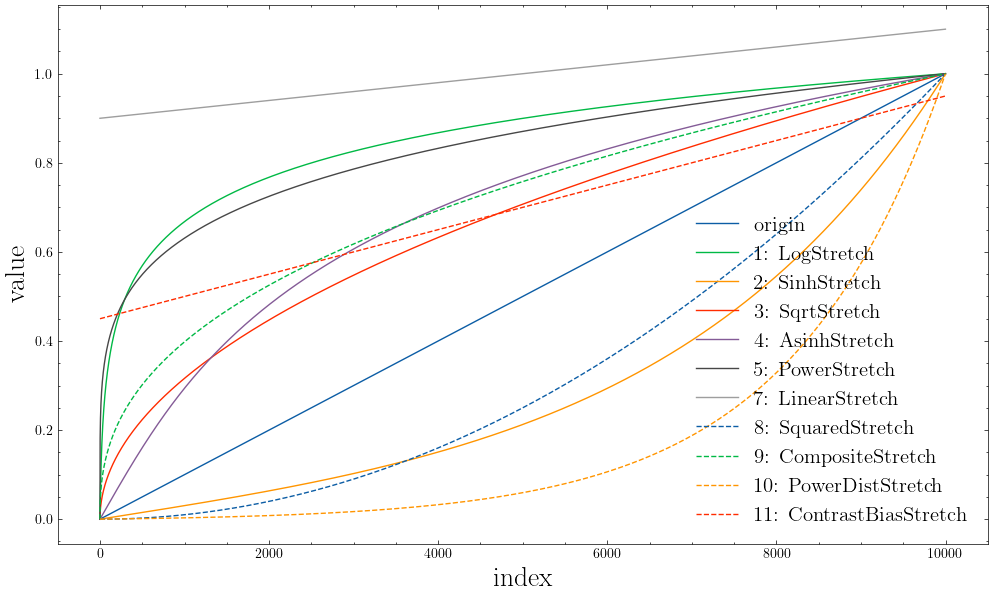

In [23]:
plt.figure(figsize=(12, 7))
plt.plot(data, label='origin')
plt.plot(data_LogStretch, label='1: LogStretch')
plt.plot(data_SinhStretch, label='2: SinhStretch')
plt.plot(data_SqrtStretch, label='3: SqrtStretch')
plt.plot(data_AsinhStretch, label='4: AsinhStretch')
plt.plot(data_PowerStretch, label='5: PowerStretch')
plt.plot(data_LinearStretch, label='7: LinearStretch')
plt.plot(data_SquaredStretch, label='8: SquaredStretch', linestyle= '--')
plt.plot(data_CompositeStretch, label='9: CompositeStretch', linestyle= '--')
plt.plot(data_PowerDistStretch, label='10: PowerDistStretch', linestyle= '--')
plt.plot(data_ContrastBiasStretch, label='11: ContrastBiasStretch', linestyle= '--')


plt.xlabel("index", fontsize=20)
plt.ylabel("value", fontsize=20)
plt.legend(fontsize=15)

---
## 实际应用：一行代码实现先归一化再stretch

In [24]:
# 本小节的实验图像
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')
hdu = fits.open(filename)[0]
image = hdu.data

### 使用`'+'`操作完成以上两次转换
* 注意顺序：<stretch> + <normalization>表示在normalization后进行stretch操作

In [25]:
transform = SqrtStretch() + PercentileInterval(90.)
transform([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

array([0.        , 0.26057865, 0.43744488, 0.56108361, 0.66202085,
       0.74948542, 0.82775913, 0.89924523, 0.96545262, 1.        ])

`'+'`操作还可以完成多种stretch的组合，用于可视化残差图

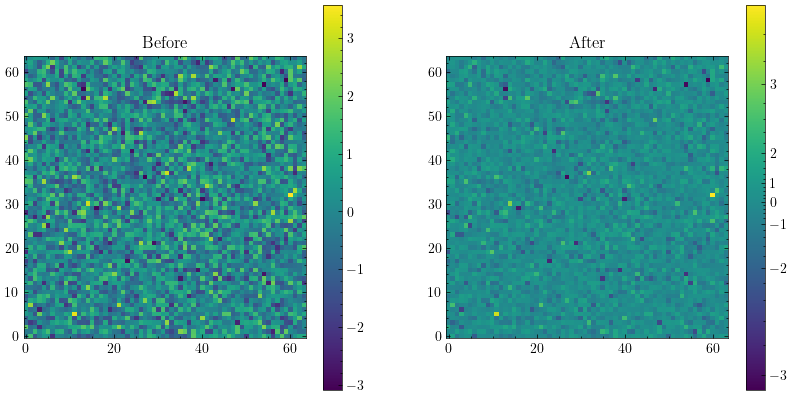

In [26]:
from astropy.visualization import (ImageNormalize, SinhStretch, LinearStretch, MinMaxInterval)

data = np.random.normal(size=(64, 64))  # 创建一个高斯噪声图，模拟残差图

stretch = LinearStretch(slope=0.5, intercept=0.5) + SinhStretch() + LinearStretch(slope=2, intercept=-1)
norm = ImageNormalize(stretch=stretch, interval=MinMaxInterval())

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
before = ax[0].imshow(data, origin='lower')
after = ax[1].imshow(data, origin='lower', norm=norm)

ax[0].set_title("Before")
ax[1].set_title("After")

fig.colorbar(before, ax=ax[0])
fig.colorbar(after, ax=ax[1])

### 使用`ImageNormalize()`完成两次转换  
* 这个实验说明，通过norm的映射，使低像素值获得了更亮的颜色，图像就可以看到更多的细节
* 归一化interval参数，还可以用vmin/vmax替代，详见文档

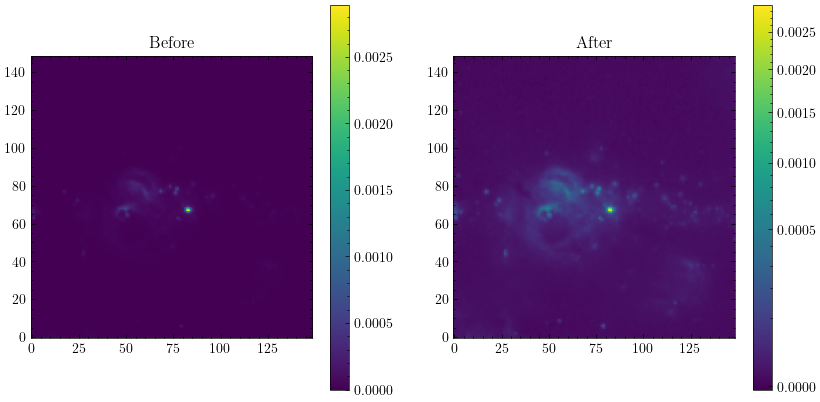

In [27]:
from astropy.visualization import ImageNormalize

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

origin = ax[0].imshow(image, origin='lower')
ax[0].set_title("Before")

norm = ImageNormalize(image, interval=MinMaxInterval(), stretch=SqrtStretch())
im = ax[1].imshow(image, origin='lower', norm=norm)
ax[1].set_title("After")

fig.colorbar(origin, ax=ax[0])
fig.colorbar(im, ax=ax[1])

### 使用`imshow_norm()`函数简化上面的画图过程

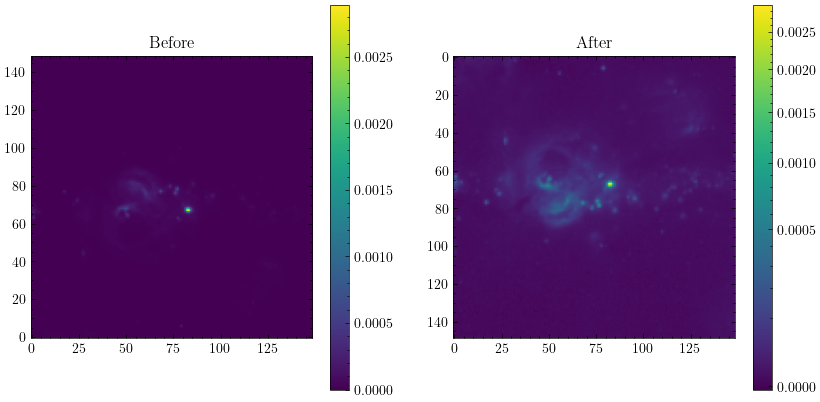

In [28]:
from astropy.visualization import imshow_norm

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

origin = ax[0].imshow(image, origin='lower')
ax[0].set_title("Before")

im, norm = imshow_norm(data=image, ax=ax[1], interval=MinMaxInterval(), stretch=SqrtStretch())
ax[1].set_title("After")

fig.colorbar(origin, ax=ax[0])
fig.colorbar(im, ax=ax[1])

### 使用`simple_norm()`函数极简画图

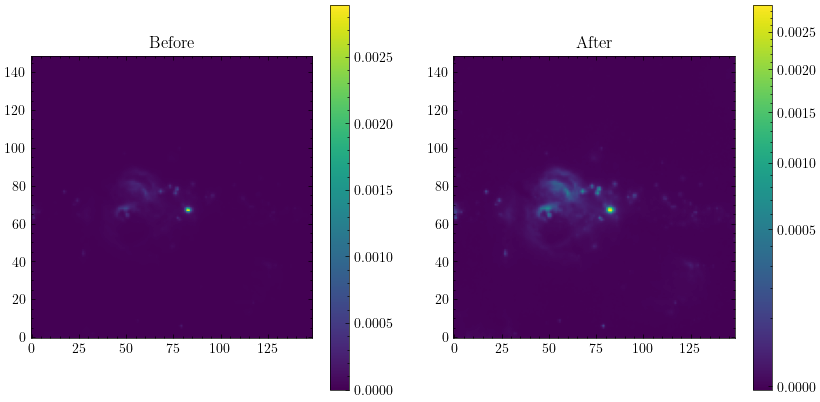

In [29]:
from astropy.visualization import simple_norm

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

origin = ax[0].imshow(image, origin='lower')
ax[0].set_title("Before")

norm = simple_norm(data=image, stretch='asinh')
after = ax[1].imshow(image, origin='lower', norm=norm)
ax[1].set_title("After")

fig.colorbar(origin, ax=ax[0])
fig.colorbar(im, ax=ax[1])